#### [PPGCC / LADESC] MDA 2024
##### Aprendizagem de transferência (TL - Transfer Learning) e Adaptação de Domínio

##### Introdução

Neste tutorial, abordaremos:

- Contexto(s) de aprendizagem de transferência
- Aproveitamento de modelos pré-treinados
- Adaptação de domínio não supervisionada

##### Lembretes da teoria

##### O contexto de aprendizagem supervisionada

Temos um conjunto de dados rotulado de $N$ amostras rotuladas: $\left\{ (\vec{x}^i,y^i) \right\}_{i=1}^N$, onde
- $\vec{x}^i = \left(x^i_1, \dots, x^i_D\right) \in \mathcal{X}$ é uma **amostra** ou **vetor de características**.
- $y^i \in \mathcal{Y}$ é o **rótulo**.
- Para classificação com $C$ classes, $\mathcal{Y} = \{0,\dots,C-1\}$, então cada $y^i$ é um **rótulo de classe**.
- Normalmente, assumimos que cada amostra rotulada $(\vec{x}^i,y^i)$
é extraída de uma distribuição conjunta
$$P(X|Y)=P(X)\cdot P(Y|X)$$
- Assumimos que alguma distribuição marginal de amostra $P(X)$ existe.
- Queremos aprender $P(Y|X)$ a partir dos dados.

Até agora, consideramos principalmente a configuração tradicional de **aprendizado supervisionado**:

Assumimos que os conjuntos de **treinamento** e **teste** (que supostamente representam dados futuros não vistos)
são ambos da mesma **distribuição** e ambos rotulados.

Conseguimos assumir isso porque queríamos resolver uma tarefa com um conjunto de dados e poderíamos
portanto, dividir nosso conjunto de dados em tais conjuntos.

O que acontece quando esse não é o caso?

##### Transfer learning (Aprendizagem de transferência)

No mundo real, muitas vezes não temos o conjunto de treinamento perfeito para o nosso problema.

O que devemos fazer quando a suposição de aprendizado supervisionado é inválida?

<img src="./img/transfer_learning_digits.png" width="700"/>

##### Domínios e tarefas

Vamos começar com algumas definições para explicar o problema.

- Imagine que temos um **espaço de características**, $\mathcal{X}$
- Por exemplo, $\mathcal{X}$ é o espaço de imagens coloridas de tamanho 32x32, cada pixel no intervalo de 0-255

In [55]:
import math
# tamanho deste espaço de recurso "limitado"
print(f'10^{math.log10(256**(32**2*3))}')

10^7398.1131734380015


- Como de costume, temos um conjunto de treinamento $X=\{\vec{x}^{(i)}\}_{i=1}^{N},\ \vec{x}^{(i)}\in\mathcal{X}$.
- Por exemplo, CIFAR-10

<img src="img/cifar10.png" width="700"/>

- Existe alguma **distribuição de probabilidade** $P(X)$ (também conhecida como $P_{X}(\vec{x})$) sobre nosso conjunto de treinamento.
    - Note que não nos importamos com a distribuição sobre $\mathcal{X}$.
    - Por exemplo, se $X$ for CIFAR-10, a probabilidade de uma imagem toda preta deve ser muito baixa
    - Se as classes forem desbalanceadas, probabilidades muito diferentes para membros de classes grandes e pequenas

    <img src="img/data_dist.jpg" width="800"/>

- Nosso **espaço de rótulos**, $\mathcal{Y}$ inclui os rótulos possíveis para amostra em nosso problema.
    - Por exemplo $\mathcal{Y}=\{0,1\}$ em classificação binária.
    - Podemos ter também $Y = \{y^{(i)}\}_{i=1}^{N}$, o conjunto de rótulos para nosso conjunto de dados.

- Queremos aprender a função alvo $\hat{y}=f(\vec{x})$ que prevê um rótulo dada uma imagem.
    - Da perspectiva probabilística, aprenda $P(\hat{y}|\vec{x})$.

- Finalmente,
    - Um **domínio** de aprendizagem $\mathcal{D}$, é definido como $\mathcal{D}=\left\{\mathcal{X},P(X)\right\}$.
    - Uma **tarefa** de aprendizagem $\mathcal{T}$ é definida como $\mathcal{T}=\{\mathcal{Y},P(Y|X)\}$.

##### Configurações do Transfer Learning

**Definição** (Pan & Yang, 2010):

Dado
- Um domínio de **origem** $\mathcal{D}_S$ (source) e a tarefa de aprendizagem $\mathcal{T}_S$
- Um domínio de **alvo** $\mathcal{D}_T$ (target) e a tarefa de aprendizagem $\mathcal{T}_T$

*A aprendizagem por transferência* visa melhorar a aprendizagem da função alvo
usando *conhecimento* em $\mathcal{D}_S$ e $\mathcal{T}_S$, quando
- $\mathcal{D}_S \neq \mathcal{D}_T$, ou
- $\mathcal{T}_S \neq \mathcal{T}_T$

Normalmente também há outras restrições no domínio alvo, como poucos ou nenhum rótulo disponível.

Quando $\mathcal{D}_S=\mathcal{D}_T$ e $\mathcal{T}_S=\mathcal{T}_T$ estamos no cenário regular de aprendizado supervisionado
que vimos até agora.

Por exemplo, dividindo o CIFAR-10 aleatoriamente em um conjunto de treinamento e teste.

##### Mesmo domínio, tarefa diferente

Lembre-se, uma **tarefa** de aprendizado $\mathcal{T}$ é definida como $\mathcal{T}=\{\mathcal{Y},P(Y|X)\}$.

Então há dois casos (não mutuamente exclusivos).

Caso 1: Os espaços de rótulo são diferentes, $\mathcal{Y}_S \neq \mathcal{Y}_T$

Por exemplo, o domínio alvo tem mais classes.

<img src="img/cifar10_100.png" width="900"/>

Caso 2: As distribuições condicionais do alvo são diferentes, $P(Y_S|X_S)\neq P(Y_T|X_T)$.

Este pode ser o caso quando o equilíbrio de classe é muito diferente nas distribuições de origem e de destino.

##### Mesma tarefa, domínio diferente

Lembre-se, um **domínio** de aprendizagem $\mathcal{D}$, é definido como $\mathcal{D}=\left\{\mathcal{X},P(X)\right\}$.

Novamente, dois casos.

Caso 1: Diferentes espaços de características, $\mathcal{X}_S \neq \mathcal{X}_T$.

Por exemplo: $\mathcal{X}_S$ é um espaço de imagens em tons de cinza enquanto $\mathcal{X}_T$ é um espaço de imagens coloridas;
documentos em diferentes idiomas.

Caso 2: Distribuições de dados diferentes, $P(X_S)\neq P(X_T)$.

Por exemplo: o domínio de origem contém imagens desenhadas à mão, enquanto o domínio de destino contém fotografias;
documentos no mesmo idioma sobre tópicos diferentes.

<img src="img/tl_example.png" width="400"/>

Este é um cenário muito comum e geralmente chamado de **adaptação de domínio**.

TL é um campo de pesquisa enorme, divido em:

<img src="img/pan_yang.png" width="1000" />

Neste tutorial, veremos dois exemplos simples, mas comuns.

##### Parte 1: Ajuste fino de um modelo pré-treinado

Nós treinamos um modelo em um domínio de origem,
e agora queremos usá-lo para acelerar o treinamento para um domínio diferente.

Em algumas aplicações, podemos ter muito menos dados rotulados no domínio alvo, tornando inviável treinar um modelo profundo do zero.

Exemplo comum: pré-treinar no ImageNet (1M+ imagens, 1000 classes) e então classificar, por exemplo, imagens médicas.

<img src="img/transfer-learning-medical.png" width="700" />

Por que isso funcionaria?

CNNs capturam características hierárquicas, com camadas mais profundas capturando características de nível superior e específicas de classe
(Zeiler & Fergus, 2013).

<img src="img/zf1.png" width="900"/>

<img src="img/zf2.png" width="1400"/>

- Portanto, podemos começar de um modelo pré-treinado e,
    - "Ajustar" os filtros convolucionais, principalmente nas camadas mais profundas.
    - Alterar o classificador (ou removê-lo completamente) para se adequar à nossa tarefa e treiná-lo do zero.

In [56]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import torch
# remove warnings
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 20
data_dir = os.path.expanduser('D:/Downloads/mda-datasets')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [57]:
import torchvision as tv

# Carregando uma CNN profunda pré-treinada no ImageNet
# Usando ResNet18, para reduzir o tamanho do download, se necessário use algo mais profundo
resnet18 = tv.models.resnet18(pretrained=True)
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [58]:
# Congelando todas as camadas: desabilitar o rastreamento de gradiente
for p in resnet18.parameters():
    p.requires_grad = False

In [59]:
# Descongelando a última camada (ou o que for relevante para você)
for p in resnet18.layer4.parameters():
    p.requires_grad = True

In [60]:
import torch.optim

# Outra maneira de congelar: taxas de aprendizagem zero para parâmetros específicos
opt = torch.optim.SGD([
    dict(params=resnet18.layer1.parameters(), lr=0),
    dict(params=resnet18.layer2.parameters(), lr=0),
    dict(params=resnet18.layer3.parameters(), lr=0),
    dict(params=resnet18.layer4.parameters(), lr=1e-4),
    dict(params=resnet18.fc.parameters()),
], lr=1e-2, momentum=0.9)

In [61]:
import torch.nn as nn

# Substituir a parte totalmente conectada por algum outro classificador, por exemplo:

cnn_features = resnet18.fc.in_features
num_classes = 13

resnet18.fc =  nn.Sequential(
    nn.Linear(cnn_features, 100, bias=True),
    nn.ReLU(),
    nn.Linear(100, num_classes, bias=True),
)

In [62]:
import torchvision.transforms as tvtf

# Importante: precisamos dimensionar nossos dados da mesma forma que os dados de treinamento do ImageNet
tf = tvtf.Compose([
    tvtf.Resize(224),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Carregando os dados do domínio alvo (CIFAR-10 usado apenas como um exemplo simples)
ds_train = tv.datasets.CIFAR10(root=data_dir, download=True, train=True, transform=tf)
ds_test = tv.datasets.CIFAR10(root=data_dir, download=True, train=False, transform=tf)

batch_size = 8
dl_train = torch.utils.data.DataLoader(ds_train, batch_size, shuffle=True, num_workers=2)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [63]:
resnet18(ds_train[0][0].unsqueeze(dim=0))

tensor([[-0.1595,  0.2325,  0.0834,  0.2905, -0.1117, -0.0960, -0.1420,  0.1619,
         -0.0622, -0.2033,  0.0857, -0.4278,  0.1981]],
       grad_fn=<AddmmBackward0>)

In [64]:
import torch.optim as optim

# Importante: Somente parâmetros que rastreiam gradientes podem ser passados para o otimizador
params_non_frozen = filter(lambda p: p.requires_grad, resnet18.parameters())
opt = optim.SGD(params_non_frozen, lr=0.05, momentum=0.9)

# O ajuste fino geralmente significa que queremos taxas de aprendizado menores do que o normal e
# decaindo-as para continuar melhorando os pesos
lr_sched = optim.lr_scheduler.ReduceLROnPlateau(opt, factor=0.05, patience=5,)

loss_fn = nn.CrossEntropyLoss()

def train(model, loss_fn, opt, lr_sched, dl_train, dl_test):
    # Assim como no treinamento regular do classificador, basta chamar lr_scheduler.step() a cada época.
    
    for epoch in range(10):
        
        model.train()
        for x, y in dl_train:
            x, y = x.to(device), y.to(device)
            opt.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            opt.step()
        
        model.eval()
        with torch.no_grad():
            test_loss = 0
            correct = 0
            total = 0
            for x, y in dl_test:
                x, y = x.to(device), y.to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                test_loss += loss.item()
                _, predicted = y_pred.max(1)
                total += y.size(0)
                correct += predicted.eq(y).sum().item()
            lr_sched.step(test_loss)
            print(f'Epoch {epoch}: Loss: {test_loss/len(dl_test)}, Accuracy: {correct/total}')

##### Parte 2: Adaptação de domínio não supervisionada

Vamos considerar um problema com domínios diferentes, mas uma tarefa idêntica:

- Domínio de origem: MNIST
- Domínio de destino: MNIST-M, uma versão colorida e texturizada do MNIST

A tarefa em ambos os casos é a classificação usual de 10 dígitos de classe.

<img src="img/mnist_m.png" />

##### Exemplo de UDA com treinamento adversarial
> DANN (Ganin et al. 2015) - Domain-Adversarial Training of Neural Networks

Configuração de DA **Não supervisionado**:

Presumimos que não há **rótulos disponíveis** para o domínio alvo.

Precisamos forçar uma CNN a aprender características das formas dos dígitos apenas, não das distribuições de cores.

A abordagem, (com base em Ganin et al. 2015):

- Treinar um classificador para o **domínio** de uma imagem com base em recursos convolucionais profundos.
    - Tentar maximizar a perda do classificador ```domain classifier``` ao treinar a CNN (**perda de confusão** - $Loss$ $L_D$).
    - Simultaneamente, minimizar a perda de classificação do ```label predictor``` no domínio de origem (**perda de rótulos** - $Loss$ $L_y$). usando os mesmos recursos convolucionais.
- Treinar o classificador de dígitos com dados do domínio de origem e o classificador de domínio com dados de ambos os domínios.

<img src="img/ganin_da.png" width="1400" />

$$
L_{total} = \frac{1}{n} \sum_{i=1}^{n} L_y^i (\theta_f,\theta_y) - \lambda \left( \frac{1}{n} \sum_{i=1}^{n} L_d^i (\theta_f,\theta_d) + \frac{1}{n^\prime} \sum_{i=1}^{n^\prime} L_d^i (\theta_f,\theta_d) \right).
$$

##### Dados de domínio fonte e alvo

Observação: para que o próximo bloco seja executado, você deve [baixar](https://1drv.ms/u/c/1ce6b4820c5c5590/EXf0iwWLDdFPn9pxMxqSPugB9vrtoWygqlEzfJ9ws8vQjw?e=JrIcf2) manualmente o conjunto de dados MNIST-M e descompactá-lo em `data_dir` que você definiu no início deste notebook.

In [65]:
from utils.data import MNISTMDataset  # Importa a classe MNISTMDataset do módulo utils.data

image_size = 28  # Define o tamanho da imagem
batch_size = 4  # Define o tamanho do lote

# Define as transformações para o domínio fonte (MNIST)
tf_source = tvtf.Compose([
    tvtf.Resize(image_size),  # Redimensiona a imagem para 28x28 pixels
    tvtf.ToTensor(),  # Converte a imagem para um tensor
    tvtf.Normalize(mean=(0.1307,), std=(0.3081,))  # Normaliza a imagem com a média e desvio padrão do MNIST
])

# Define as transformações para o domínio alvo (MNIST-M)
tf_target = tvtf.Compose([
    tvtf.Resize(image_size),  # Redimensiona a imagem para 28x28 pixels
    tvtf.ToTensor(),  # Converte a imagem para um tensor
    tvtf.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    # Normaliza a imagem com a média e desvio padrão do MNIST-M
])

# Carrega o conjunto de dados MNIST com as transformações definidas
ds_source = tv.datasets.MNIST(root=data_dir, train=True, transform=tf_source, download=True)
# Cria um DataLoader para o conjunto de dados MNIST
dl_source = torch.utils.data.DataLoader(ds_source, batch_size)

# Carrega o conjunto de dados MNIST-M com as transformações definidas
ds_target = MNISTMDataset(os.path.join(data_dir, 'mnist_m', 'mnist_m_train'),
                          os.path.join(data_dir, 'mnist_m', 'mnist_m_train_labels.txt'),
                          transform=tf_target)
# Cria um DataLoader para o conjunto de dados MNIST-M
dl_target = torch.utils.data.DataLoader(ds_target, batch_size)

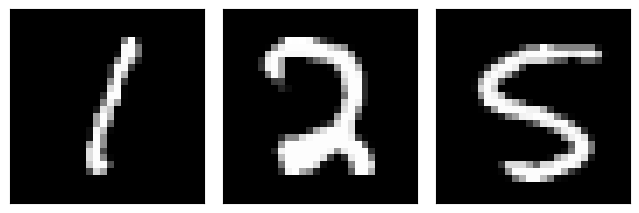

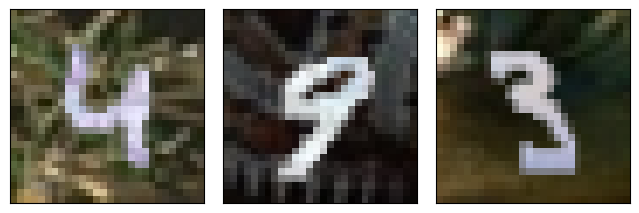

In [66]:
from utils.plots import dataset_first_n

dataset_first_n(ds_source, 3, cmap='gray');
dataset_first_n(ds_target, 3);

##### Modelo

Nosso modelo consistirá em três partes, como na figura:

- Uma CNN "profunda" para extração de características de imagem (2x Conv, ReLU, MaxPool)
- Um classificador de dígitos (3x FC, ReLU)
- Um classificador de domínio (2x FC, ReLU), com uma **camada de reversão de gradiente** (GRL).

<img src="img/ganin_da2.png" width="1400" />

Lembre-se: GRL não é utilizado no forward (passe para a frente), mas aplica-se o fator $-\lambda$ ao gradiente no backward (passe para trás).

Como podemos implementar isso?

In [67]:
from torch.autograd import Function  # Importa a classe base Function do módulo autograd do PyTorch

class GradientReversalFn(Function):
    @staticmethod
    def forward(ctx, x, alpha):
        # Armazena o valor de alpha no contexto para uso na etapa backward
        ctx.alpha = alpha
        # Retorna a entrada sem modificações
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        # Inverte o gradiente multiplicando por -alpha
        output = grad_output.neg() * ctx.alpha
        # Retorna o gradiente modificado e None para o segundo argumento (não há gradiente para alpha)
        return output, None

In [68]:
class DACNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Define a rede de extração de características
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5),  # Primeira camada convolucional
            nn.BatchNorm2d(64),  # Normalização em lote
            nn.MaxPool2d(2),  # Camada de pooling
            nn.ReLU(True),  # Função de ativação ReLU
            nn.Conv2d(64, 50, kernel_size=5),  # Segunda camada convolucional
            nn.BatchNorm2d(50),  # Normalização em lote
            nn.Dropout2d(),  # Camada de dropout
            nn.MaxPool2d(2),  # Camada de pooling
            nn.ReLU(True),  # Função de ativação ReLU
        )
        # Define o classificador de dígitos
        self.class_classifier = nn.Sequential(
            nn.Linear(50 * 4 * 4, 100),  # Primeira camada totalmente conectada
            nn.BatchNorm1d(100),  # Normalização em lote
            nn.Dropout2d(),  # Camada de dropout
            nn.ReLU(True),  # Função de ativação ReLU
            nn.Linear(100, 100),  # Segunda camada totalmente conectada
            nn.BatchNorm1d(100),  # Normalização em lote
            nn.ReLU(True),  # Função de ativação ReLU
            nn.Linear(100, 10),  # Camada de saída
            nn.LogSoftmax(dim=1),  # Função de ativação LogSoftmax
        )
        # Define o classificador de domínio
        self.domain_classifier = nn.Sequential(
            nn.Linear(50 * 4 * 4, 100),  # Primeira camada totalmente conectada
            nn.BatchNorm1d(100),  # Normalização em lote
            nn.ReLU(True),  # Função de ativação ReLU
            nn.Linear(100, 2),  # Camada de saída
            nn.LogSoftmax(dim=1),  # Função de ativação LogSoftmax
        )

    def forward(self, x, grl_lambda=1.0):
        # Expande a entrada para ter 3 canais
        x = x.expand(x.data.shape[0], 3, image_size, image_size)

        # Extrai características da entrada
        features = self.feature_extractor(x)
        features = features.view(-1, 50 * 4 * 4)  # Redimensiona as características para um vetor

        # Aplica a função de reversão de gradiente
        reverse_features = GradientReversalFn.apply(features, grl_lambda)

        # Predição de classe
        class_pred = self.class_classifier(features)
        # Predição de domínio
        domain_pred = self.domain_classifier(reverse_features)

        return class_pred, domain_pred  # Retorna as predições de classe e domínio

Por que deixar $\lambda$ (`grl_lambda` no código) mudar durante o treinamento (por exemplo, a cada época)?

- No início do treinamento, a perda de domínio é extremamente ruidosa, pois os recursos da CNN ainda não são bons.
- Portanto, lambda é gradualmente alterado de 0 para 1 no curso do treinamento.
$$
\lambda_p = \frac{2}{1+\exp(-10\cdot p)} -1,
$$
onde $p\in[0,1]$ é o progresso do treinamento.

In [69]:
# Instancia o modelo DACNN
model = DACNN()

# Obtém o primeiro lote de dados do domínio fonte
x0_s, y0_s = next(iter(dl_source))
# Obtém o primeiro lote de dados do domínio alvo
x0_t, y0_t = next(iter(dl_target))

# Imprime as formas dos dados do domínio fonte e alvo
print('source domain: ', x0_s.shape, y0_s.shape)
print('target domain: ', x0_t.shape, y0_t.shape)

# Passa o lote de dados do domínio fonte pelo modelo
model(x0_s)
# Passa o lote de dados do domínio alvo pelo modelo
model(x0_t)

source domain:  torch.Size([4, 1, 28, 28]) torch.Size([4])
target domain:  torch.Size([4, 3, 28, 28]) torch.Size([4])


(tensor([[-2.0586, -2.3200, -2.6064, -2.4523, -2.3839, -1.5467, -2.6933, -2.6841,
          -2.5299, -2.3705],
         [-2.9822, -3.3740, -2.7553, -3.0067, -2.9056, -1.5346, -2.6287, -1.8299,
          -2.7318, -1.4522],
         [-2.6543, -2.5895, -2.4633, -2.3776, -2.5612, -1.9458, -2.8065, -1.6562,
          -2.5208, -2.0801],
         [-2.6944, -2.5950, -2.8209, -2.7695, -2.7241, -1.8769, -1.9581, -2.0780,
          -2.2852, -1.9051]], grad_fn=<LogSoftmaxBackward0>),
 tensor([[-0.7825, -0.6111],
         [-0.8194, -0.5810],
         [-0.3430, -1.2366],
         [-0.6632, -0.7240]], grad_fn=<LogSoftmaxBackward0>))

##### Treinamento

In [70]:
lr = 1e-3  # Define a taxa de aprendizado para o otimizador
n_epochs = 1  # Define o número de épocas para o treinamento

model = DACNN()  # Instancia o modelo DACNN
optimizer = optim.Adam(model.parameters(), lr)  # Cria o otimizador Adam com a taxa de aprendizado definida

# Duas funções de perda: uma para classificação e outra para domínio
loss_fn_class = torch.nn.NLLLoss()  # Função de perda para a classificação de dígitos
loss_fn_domain = torch.nn.NLLLoss()  # Função de perda para a classificação de domínio

In [71]:
batch_size = 1024  # Define o tamanho do lote para o DataLoader

# Cria um DataLoader para o conjunto de dados de origem (MNIST) com o tamanho de lote definido
dl_source = torch.utils.data.DataLoader(ds_source, batch_size)

# Cria um DataLoader para o conjunto de dados de destino (MNIST-M) com o tamanho de lote definido
dl_target = torch.utils.data.DataLoader(ds_target, batch_size)

# Carrega o conjunto de dados de validação (MNIST) com as transformações definidas
dl_validation = tv.datasets.MNIST(root=data_dir, train=False, transform=tf_source, download=True)

# Define o número máximo de lotes a serem treinados como o número de lotes do conjunto de dados de origem menos 2
# max_batches = min(len(dl_source), len(dl_target))  # Alternativa: usar o menor número de lotes entre os dois conjuntos de dados
max_batches = len(dl_source) - 2

In [72]:
# Treinamento com validação
for epoch_idx in range(n_epochs):
    # Imprime o número da época atual
    print(f'Epoch {epoch_idx + 1:04d} / {n_epochs:04d}', end='\n=================\n')

    # Cria iteradores para os DataLoaders dos domínios fonte e alvo
    dl_source_iter = iter(dl_source)
    dl_target_iter = iter(dl_target)

    for batch_idx in range(max_batches):
        # Zera os gradientes do otimizador
        optimizer.zero_grad()

        # Calcula o progresso do treinamento e o valor de lambda para a GRL
        p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
        grl_lambda = 2. / (1. + np.exp(-10 * p)) - 1

        # Treino do domínio fonte
        X_s, y_s = next(dl_source_iter)  # Obtém o próximo lote de dados do domínio fonte
        y_s_domain = torch.zeros(batch_size, dtype=torch.long)  # Define os rótulos do domínio fonte

        # Passa os dados pelo modelo e calcula as perdas
        class_pred, domain_pred = model(X_s, grl_lambda)
        loss_s_label = loss_fn_class(class_pred, y_s)
        loss_s_domain = loss_fn_domain(domain_pred, y_s_domain)

        # Treino do domínio alvo
        X_t, _ = next(dl_target_iter)  # Obtém o próximo lote de dados do domínio alvo (ignorando os rótulos)
        y_t_domain = torch.ones(batch_size, dtype=torch.long)  # Define os rótulos do domínio alvo

        # Passa os dados pelo modelo e calcula a perda do domínio alvo
        _, domain_pred = model(X_t, grl_lambda)
        loss_t_domain = loss_fn_domain(domain_pred, y_t_domain)

        # Calcula a perda total e realiza o backpropagation
        loss = loss_t_domain + loss_s_domain + loss_s_label
        loss.backward()
        optimizer.step()

        # Imprime as perdas e o valor de lambda
        print(f'[{batch_idx + 1}/{max_batches}] '
              f'class_loss: {loss_s_label.item():.4f} ' f's_domain_loss: {loss_s_domain.item():.4f} '
              f't_domain_loss: {loss_t_domain.item():.4f} ' f'grl_lambda: {grl_lambda:.3f} '
              )

Epoch 0001 / 0001
[1/57] class_loss: 2.3620 s_domain_loss: 0.9464 t_domain_loss: 0.5523 grl_lambda: 0.000 
[2/57] class_loss: 2.1672 s_domain_loss: 0.8822 t_domain_loss: 0.5862 grl_lambda: 0.087 
[3/57] class_loss: 2.0093 s_domain_loss: 0.8327 t_domain_loss: 0.5994 grl_lambda: 0.174 
[4/57] class_loss: 1.9240 s_domain_loss: 0.7906 t_domain_loss: 0.6295 grl_lambda: 0.257 
[5/57] class_loss: 1.8503 s_domain_loss: 0.7493 t_domain_loss: 0.6713 grl_lambda: 0.337 
[6/57] class_loss: 1.7511 s_domain_loss: 0.7080 t_domain_loss: 0.6959 grl_lambda: 0.412 
[7/57] class_loss: 1.6931 s_domain_loss: 0.6718 t_domain_loss: 0.7265 grl_lambda: 0.483 
[8/57] class_loss: 1.6270 s_domain_loss: 0.6475 t_domain_loss: 0.7492 grl_lambda: 0.547 
[9/57] class_loss: 1.5462 s_domain_loss: 0.6221 t_domain_loss: 0.7751 grl_lambda: 0.605 
[10/57] class_loss: 1.4928 s_domain_loss: 0.6070 t_domain_loss: 0.7832 grl_lambda: 0.658 
[11/57] class_loss: 1.4127 s_domain_loss: 0.5982 t_domain_loss: 0.7946 grl_lambda: 0.705 
[

### Visualização dos embeddings

O espaço das features convolucionais aprendidas pelo modelo.

Lembre-se, a perda de confusão de domínio deveria fazer com que as imagens de ambos os domínios parecessem iguais para o classificador.

<img src="img/ganin_da3.png" width="1400"/>

**Créditos de imagens**

Algumas imagens neste tutorial foram tiradas e/ou adaptadas de:

- Pan & Yang, 2010, A Survey on Transfer Learning
- Zeiler & Fergus, 2013, Visualizing and Understanding Convolutional Networks
- Y. Ganin et al. 2015, Unsupervised Domain Adaptation by Backpropagation 
- M. Wulfmeier et al., https://arxiv.org/abs/1703.01461v2
- Sebastian Ruder, http://ruder.io/